# Regression metrics

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data
df_income = pd.read_csv('income_data.csv')

In [3]:
df_income.columns

Index(['Income', 'Age', 'Education', 'Smoker'], dtype='object')

In [4]:
# independent variable columns
ind_var = ['Age', 'Education', 'Smoker']
x = df_income.loc[:,ind_var]
# dependent variable column
y = df_income['Income']

In [5]:
# preprocessing
min_max_scaler = MinMaxScaler()
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=ind_var)
x.head()

,Age,Education,Smoker
0,0.980769,0.2,1.0
1,0.653846,0.8,0.0
2,0.903846,0.4,0.0
3,0.769231,0.2,0.0
4,0.250000,0.6,1.0


In [6]:
# split into training and testing set
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=0)

In [7]:
# build linear regression model
regression = linear_model.LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [8]:
# predict for the test set
y_predict = regression.predict(x_test)

In [9]:
# Mean Squared Error (MSE)
se = (y_test-y_predict)**2
MSE = se.mean()
MSE

141.62374278892193

In [10]:
# Root Mean Squared Error (RMSE)
RMSE = np.sqrt(MSE)
RMSE

11.900577414097265

In [11]:
# Mean Absolute Percentage Error (MAPE)
ape = np.abs(y_test-y_predict)/np.abs(y_test)
MAPE = ape.mean()
MAPE

0.14540505381181348

In [12]:
# Mean Absolute Error (MAE)
ae = np.abs(y_test-y_predict)
MAE = ae.mean()
MAE

9.386861215208576

In [13]:
# R^2 (coefficient of determination)
SS_res = sum((y_test-y_predict)**2)
SS_tot = sum((y_test-y_test.mean())**2)

Rsq = 1-(SS_res/SS_tot)
Rsq

0.6506511369433944

# Classification metrics

In [15]:
# load the data
df_phones = pd.read_csv('data_phones_2.csv')

In [16]:
df_phones.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,low
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,high
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,high
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,high
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,low


In [17]:
# price_range column - convert 'low' to 0 and 'high' to 1.
mapper = {'low': 0, 'high': 1}
df_phones['price_range'].replace(mapper, inplace=True)

In [18]:
df_phones.dropna(inplace=True)

In [19]:
# counts of the classes
df_phones.price_range.value_counts()

0    1000
1    1000
Name: price_range, dtype: int64

In [20]:
X = df_phones.drop('price_range',axis=1).values
y = df_phones.price_range.values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [22]:
# c-support vector classification
classif = SVC(C=1.0,
               kernel='rbf',
               degree=3,
               gamma='scale',
               coef0=0.0,
               shrinking=True,
               probability=True,
               tol=0.001,
               cache_size=200,
               class_weight=None,
               verbose=False,
               max_iter=-1,
               decision_function_shape='ovr',
               break_ties=False,
               random_state=None)

In [23]:
classif.fit(X_train,y_train)

SVC(probability=True)

In [24]:
y_predict = classif.predict(X_test)

In [25]:
# confusion matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[196,   0],
       [  3, 201]], dtype=int64)

<Axes: >

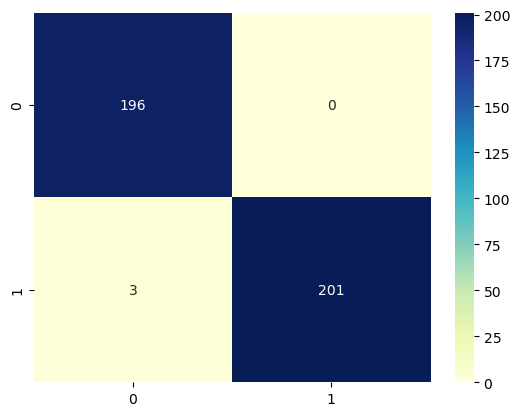

In [26]:
# confusion matrix heatmap (with seaborn)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

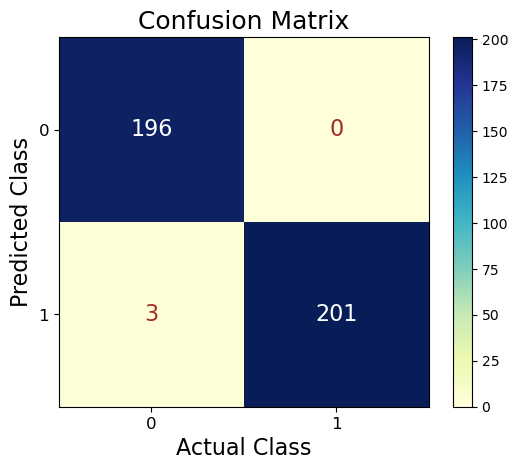

In [27]:
# confusion matrix heatmap (with matplotlib)
plt.imshow(cm, cmap='YlGnBu')
plt.xticks([0,1], fontsize=12)
plt.yticks([0,1], fontsize=12)
plt.xlabel('Actual Class', fontsize=16)
plt.ylabel('Predicted Class', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if (i == j):
            colour = 'white'
        else:
            colour = 'brown'
        plt.text(i, j, cm[j,i],
                 ha='center', va='center',
                 fontsize=16, color=colour)
plt.colorbar()
plt.show()

In [28]:
# TP, FP, TN, FN
def find_TP(y_test, y_predict):
    # true positives (y_test = 1, y_predict = 1)
    return sum((y_test == 1) & (y_predict == 1))
def find_FP(y_test, y_predict):
    # false negatives (y_test = 1, y_predict = 0)
    return sum((y_test == 1) & (y_predict == 0))
def find_FN(y_test, y_predict):
    # false positives (y_test = 0, y_predict = 1)
    return sum((y_test == 0) & (y_predict == 1))
def find_TN(y_test, y_predict):
    # true negatives (y_test = 0, y_predict = 0)
    return sum((y_test == 0) & (y_predict == 0))

In [29]:
TP = find_TP(y_test, y_predict)
TP

201

In [30]:
FP = find_FP(y_test, y_predict)
FP

3

In [31]:
TN = find_TN(y_test, y_predict)
TN

196

In [32]:
FN = find_FN(y_test, y_predict)
FN

0

In [33]:
all_obs = TP + FP + TN + FN
all_obs

400

In [34]:
# accuracy
accuracy = accuracy_score(y_test,y_predict)
accuracy_1 = (TP + TN) / all_obs
accuracy, accuracy_1

(0.9925, 0.9925)

In [35]:
# precision
precision = precision_score(y_test,y_predict)
precision_1 = TP / (TP + FP)
precision, precision_1

(1.0, 0.9852941176470589)

In [36]:
# recall
recall = recall_score(y_test,y_predict)
recall_1 = TP / (TP + FN)
recall, recall_1

(0.9852941176470589, 1.0)

In [37]:
# F-1 score
F1 = f1_score(y_test, y_predict)
F1_1 = 2 / (1/precision + 1/recall)
F1, F1_1

(0.9925925925925926, 0.9925925925925925)

#### ROC curve and AUC

In [38]:
# predict probabilities
probs = classif.predict_proba(X)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

In [39]:
# calculate auc score
auc = roc_auc_score(y, probs)
auc

0.999444

In [40]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)

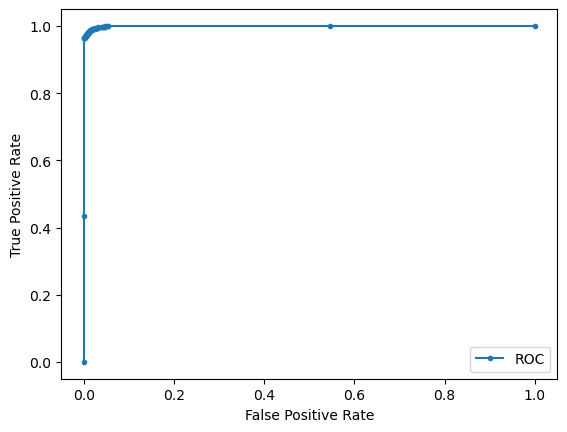

In [41]:
# plot the roc curve 
plt.plot(fpr, tpr, marker='.', label='ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()